In [39]:
import numpy as np
import pandas as pd

from sklearn.datasets import make_blobs
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
import sklearn 
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

In [31]:
df = pd.read_csv('../csv/players_stats.csv')

clustering_df = df.drop(columns=["Unnamed: 0","Player", "final_team","Pos"])

In [47]:
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(clustering_df)
distances, indices = nbrs.kneighbors(clustering_df)

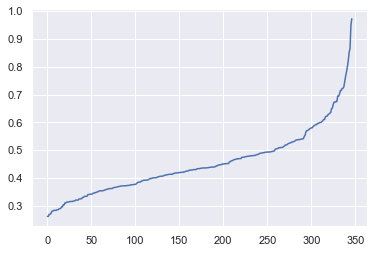

In [33]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

In [34]:
m = DBSCAN(eps=0.6, min_samples=5)
m.fit(clustering_df)

DBSCAN(eps=0.6)

In [41]:
clusters = m.labels_

In [36]:
colors = ['royalblue', 'maroon', 'forestgreen', 'mediumorchid', 'tan', 'deeppink', 'olive', 'goldenrod', 'lightcyan', 'navy']
vectorizer = np.vectorize(lambda x: colors[x % len(colors)])

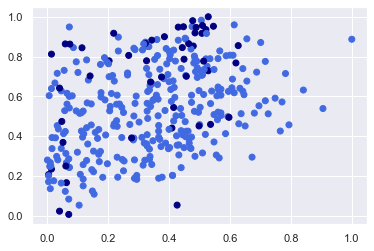

In [37]:
plt.scatter(clustering_df[clustering_df.columns[0]], clustering_df[clustering_df.columns[1]], c=vectorizer(clusters))

In [45]:
print(len(clusters))

347


In [46]:
print(len(clustering_df))

347
